In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
from matplotlib.image import imread
from sklearn.metrics import classification_report
#tensorflow modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
data = "../input/cell-images-for-detecting-malaria/cell_images/cell_images/"

In [5]:
os.listdir(data)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/cell-images-for-detecting-malaria/cell_images/cell_images/'

## Count of Images for Uninfected and Parasitized

In [4]:
uninfected = len(os.listdir("../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected"))
parasitized = len(os.listdir("../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized"))
print("Uninfected: ",uninfected)
print("Parasitized: ", parasitized)

Uninfected:  13780
Parasitized:  13780


## Shape of Images

In [5]:
parasitized_data = os.listdir("../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized")

In [6]:
sh=data+"/Parasitized"+"/C99P60ThinF_IMG_20150918_141001_cell_133.png"
print("Shape of image: ",imread(sh).shape)

Shape of image:  (145, 142, 3)


# Images of Uninfected

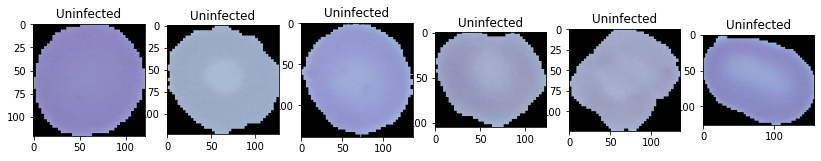

In [7]:
plt.figure(figsize=(14,14))
import random, cv2
for i in range(6):
    plt.subplot(2,6,i+1)
    type1="Uninfected"
    imgdir = data+ type1
    imgfile = np.random.choice(os.listdir(imgdir))
    img = cv2.imread(imgdir+"/"+imgfile)
    plt.imshow(img)
    plt.title(type1)
plt.show()

# Images of Paratisitized

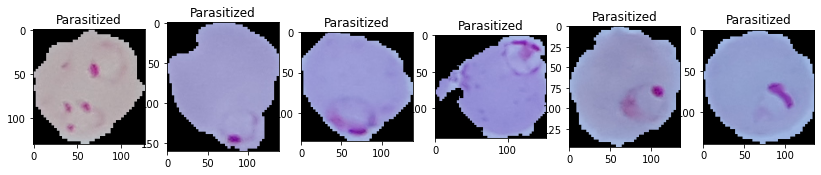

In [8]:
plt.figure(figsize=(14,14))
for i in range(6):
    plt.subplot(2,6,i+1)
    type2="Parasitized"
    imgdir = data+ type2
    imgfile = np.random.choice(os.listdir(imgdir))
    img = cv2.imread(imgdir+"/"+imgfile)
    plt.imshow(img)
    plt.title(type2)
plt.show()

# Image Manipulation

In [9]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               shear_range=0.1,
                               fill_mode="nearest")

In [10]:
train = tf.keras.preprocessing.image_dataset_from_directory(data,
                                                            validation_split=0.2,
                                                            seed=123,
                                                            subset="training",
                                                            image_size=(134,131),
                                                            batch_size=32)
test = tf.keras.preprocessing.image_dataset_from_directory(data,
                                                           validation_split=0.2,
                                                           seed=123,
                                                           subset="validation",
                                                           image_size=(134,131),
                                                           batch_size=32)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [11]:
test.class_names

['Parasitized', 'Uninfected']

In [12]:
# defining sequential model
model = Sequential()

#adding convo-pool layers
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(134,131,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(134,131,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(134,131,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=(134,131,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# flattening image
model.add(Flatten())

# adding dense layers
model.add(Dense(128,activation='relu'))
# adding dropout to minimize overfitting issue
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

#compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=["accuracy"])

#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 134, 131, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 67, 65, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 65, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       2

## Implementing Early stop method

In [13]:
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [14]:
history = model.fit(train,validation_data=test,epochs=20,callbacks=[early_stop],verbose=True)

Epoch 1/20
689/689 [==============================] - 206s 291ms/step - loss: 1.5685 - accuracy: 0.6436 - val_loss: 0.1859 - val_accuracy: 0.9425
Epoch 2/20
689/689 [==============================] - 91s 132ms/step - loss: 0.1790 - accuracy: 0.9417 - val_loss: 0.1681 - val_accuracy: 0.9490
Epoch 3/20
689/689 [==============================] - 91s 132ms/step - loss: 0.1432 - accuracy: 0.9555 - val_loss: 0.1301 - val_accuracy: 0.9577
Epoch 4/20
689/689 [==============================] - 92s 133ms/step - loss: 0.1382 - accuracy: 0.9571 - val_loss: 0.1400 - val_accuracy: 0.9561
Epoch 5/20
689/689 [==============================] - 93s 135ms/step - loss: 0.1232 - accuracy: 0.9594 - val_loss: 0.1406 - val_accuracy: 0.9579
Epoch 6/20
689/689 [==============================] - 93s 135ms/step - loss: 0.1200 - accuracy: 0.9622 - val_loss: 0.2047 - val_accuracy: 0.9399
Epoch 7/20
689/689 [==============================] - 93s 135ms/step - loss: 0.1184 - accuracy: 0.9619 - val_loss: 0.1534 - val_a

In [16]:
model.save_weights("Malaria.h5")

In [17]:
cc=model.load_weights("./Malaria.h5")

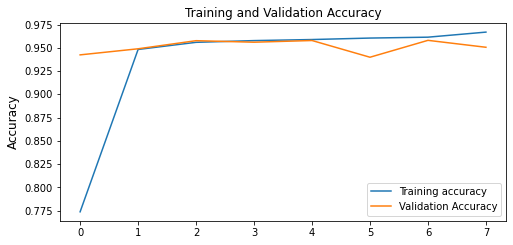

In [20]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc,label="Training accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.show()

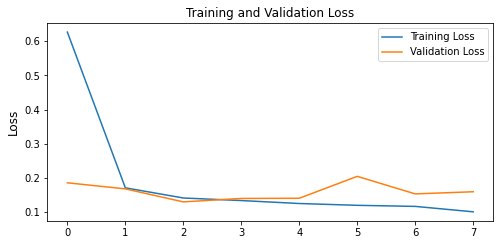

In [24]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss",fontsize=12)
plt.show()

In [19]:
model.evaluate(test, verbose=1)

173/173 [==============================] - 18s 101ms/step - loss: 0.1597 - accuracy: 0.9506


[0.15965181589126587, 0.9506441950798035]

In [22]:
from sklearn.metrics import accuracy_score
pred = model.predict_classes(test)

In [23]:
pred[:10]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1]], dtype=int32)